# import libraries

In [137]:
import random
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Classes to Generate Training and Test Data

In [136]:
class AddMe(list):
    '''
    makes a list of length list_size with x1, x2, and y
    sometimes y is random, but math_accuracy of the time y = x1 + x2
    this is an added list, along with some errors / noise 
    other notes:
    inherits from list 
    lists of lists works as a data structure for sklearn
    '''

    def __init__(self, list_size, math_accuracy):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.math_accuracy = math_accuracy
        self.list_initialise(self.list_size, self.math_accuracy)
    
    def __str__(self):
        return f"{self.list_size} training numbers at {self.math_accuracy:.0%} accuracy"

    def list_initialise(self, list_size, math_accuracy):
        for i in range(list_size):
            # initialise x and y values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)

            # rand num * 2 so that plot and rand share the same range
            if i / list_size >= math_accuracy:
                y = random.randint(self.MIN_NUM * 2, self.MAX_MUM * 2)
                while y == x1 + x2:
                    y = random.randint(self.MIN_NUM * 2, self.MAX_MUM * 2)
            else:
                y = x1 + x2
            
            self.append([x1, x2, y])

        # sort finished list so errors are spread out
        self.sort()


class TestMe(list):
    '''
    makes a list of length list_size with random x1, x2
    '''

    def __init__(self, list_size):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.list_initialise(self.list_size)

    def __str__(self):
        return f"{self.list_size} test numbers"

    def list_initialise(self, list_size):
        for i in range(list_size):
            # initialise x values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            self.append([x1, x2])

        # sort finished list so errors are spread out
        self.sort()

In [128]:
# Training Cases - small, medium, and large, between 50% and 100% accuracy

small_100 = AddMe(100, 1)
small_99 = AddMe(100, 0.99)
small_90 = AddMe(100, 0.9)
small_75 = AddMe(100, 0.75)
small_50 = AddMe(100, 0.5)

medium_100 = AddMe(1000, 1)
medium_99 = AddMe(1000, 0.99)
medium_90 = AddMe(1000, 0.9)
medium_75 = AddMe(1000, 0.75)
medium_50 = AddMe(1000, 0.5)

large_100 = AddMe(10000, 1)
large_99 = AddMe(10000, 0.99)
large_90 = AddMe(10000, 0.9)
large_75 = AddMe(10000, 0.75)
large_50 = AddMe(10000, 0.5)

# Check Math Function

In [3]:
def check_math(inputlist):
    '''
    takes in list of list, x1, x2, and y
    returns number of rows, # times y = x1 + x2, and mean square error
    ie, (rows, correct, MSE)
    '''

    rows = 0
    correct = 0
    correct_when_rounded = 0
    MSE = 0

    for x in inputlist:
        rows += 1

        # correct_when_rounded needs to slice into np.array() for tensorflow
        try:
            if round(x[0] + x[1]) == round(x[2]):
                correct_when_rounded += 1
        except:
            if round(x[0] + x[1]) == round(x[2][0]):
                correct_when_rounded += 1

        if x[0] + x[1] == x[2]:
            correct += 1
        else:
            MSE += (x[2] - (x[0] + x[1])) ** 2

    MSE = MSE / rows
    
    return rows, correct_when_rounded, correct, MSE

# Import all machine learning algorithms and initialise for testing

In [4]:
# !pip install tensorflow.keras

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# initialise all models
# just use default parameters
# tuning is likely to improve any of these models

# decision tree
dt_model = DecisionTreeClassifier()

# # naive Bayes
nb_model = GaussianNB()

# linear regression
lr_model = LinearRegression()

# random forest
rf_model = RandomForestClassifier()

########################################################
# xgboost (uncomment as needed)
########################################################
# needs tuning because very slow

# # runs large_100 in 162 seconds, MSE: 61
# # should take 15+ minutes to run
# xgb_model = XGBClassifier(use_label_encoder=False)  

# runs large_100 in 93 seconds, MSE: 23
# should take 8+ minutes to run
xgb_model = XGBClassifier(use_label_encoder=False,
                          learning_rate=0.3,
                          gamma=1,
                          max_depth=3, 
                          subsample=0.5,
                          eval_metric='rmse',
                          n_estimators=50)

# # runs large_100 in 33 seconds, MSE: 91
# # should take ~3 minutes to run
# xgb_model = XGBClassifier(use_label_encoder=False,
#                           learning_rate=0.5,
#                           gamma=0,
#                           max_depth=3, 
#                           subsample=0.2,
#                           eval_metric='rmse',
#                           n_estimators=20)

########################################################

# tensor flow (obviously this isn't "default", but it is what I consider
# to be a normal looking non-tweaked neural network)
tf_width = 256  # not sure what makes sense here
tf_dropout = 0
tf_model = Sequential()
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(1))
tf_model.compile(optimizer="rmsprop", loss="mse")

# set up lists

In [129]:
# set up lists of models / sets

list_of_models = [dt_model, nb_model, lr_model, rf_model, xgb_model, tf_model]

training_sets = [small_100, small_99, small_90, small_75, small_50, 
                 medium_100, medium_99, medium_90, medium_75, medium_50, 
                 large_100, large_99, large_90, large_75, large_50]

set_names = ['small_100', 'small_99', 'small_90', 'small_75', 'small_50', 
             'medium_100', 'medium_99', 'medium_90', 'medium_75', 'medium_50', 
             'large_100', 'large_99', 'large_90', 'large_75', 'large_50']

model_prefix = ['dt_', 'nb_', 'lr_', 'rf_', 'xgb_', 'tf_']

# train model, predict model functions

In [234]:
def train_model(model, training_set):
    # split into X and y
    ind_var = [sublist[:2] for sublist in training_set]  # x1 and x2
    dep_var = [sublist[2] for sublist in training_set]  # y

    # fit to training set (np.array() for XGBoost)
    model.fit(np.array(ind_var), np.array(dep_var))
    return model


def predict_model(model, test_set):
    return model.predict(np.array(test_set))

# Train the models on all training sets and output predictions to check_math()

In [50]:
def fit_model_to_data(model, list_of_training_sets, n_tests):
    '''
    takes in the ML model, a list of training sets, and the number of
    tests to perform. checks math using check_math() from above.
    uses np.array() to match input requirements for XGBoost; lists
    of lists work for sklearn models.
    '''
    
    # these are likely the same as the min and max above
    # but they don't need to be. maybe try testing extreme values
    MIN_TEST = -100
    MAX_TEST = 100

    # initialise an empty list 
    results = []

    for training_set in list_of_training_sets:

        # fit model
        fit_model = train_model(model, training_set)

        # test model
        test_set = TestMe(n_tests)
        predictions = predict_model(model, test_set)
        test_list = np.column_stack((test_set, predictions))
        
        # test predictions with check_math(inputlist)
        results.append(check_math(test_list))

    return results


In [ ]:
%%time
n_model = 0
n_tests = 1000

dt_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(list_of_models[n_model])
print(pd.DataFrame(dt_results))

DecisionTreeClassifier()
       0    1    2    3
0   1000   14   14  545
1   1000   18   18  937
2   1000   24   24  768
3   1000   14   14 5283
4   1000    7    7 5654
5   1000   65   65   48
6   1000   76   76  161
7   1000   62   62  830
8   1000   67   67 2583
9   1000   32   32 5361
10  1000  268  268    3
11  1000  253  253   26
12  1000  260  260  893
13  1000  189  189 2444
14  1000  137  137 4360
CPU times: user 886 ms, sys: 11.9 ms, total: 898 ms
Wall time: 896 ms


In [ ]:
%%time
n_model = 1
n_tests = 1000

nb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(list_of_models[n_model])
print(pd.DataFrame(nb_results))

GaussianNB()
       0   1   2    3
0   1000  11  11 2126
1   1000  10  10 2188
2   1000  13  13 1918
3   1000   9   9 9004
4   1000   6   6 3691
5   1000  38  38  271
6   1000  31  31  220
7   1000  23  23  402
8   1000  24  24  688
9   1000  18  18 1699
10  1000  24  24  339
11  1000  18  18  418
12  1000  31  31  423
13  1000  21  21  418
14  1000  21  21 1009
CPU times: user 981 ms, sys: 615 µs, total: 982 ms
Wall time: 981 ms


In [ ]:
%%time
n_model = 2
n_tests = 1000

lr_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(list_of_models[n_model])
print(pd.DataFrame(lr_results))

LinearRegression()
       0     1    2    3
0   1000  1000  239    0
1   1000   209    0    4
2   1000   124    0    8
3   1000    12    0 1171
4   1000     6    0 1403
5   1000  1000   36    0
6   1000   489    0    1
7   1000    55    0   38
8   1000    18    0  518
9   1000    17    0 1706
10  1000  1000   65    0
11  1000   582    0    0
12  1000    56    0   70
13  1000    19    0  397
14  1000     7    0 1578
CPU times: user 239 ms, sys: 0 ns, total: 239 ms
Wall time: 260 ms


In [ ]:
%%time
n_model = 3
n_tests = 1000

rf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(list_of_models[n_model])
print(pd.DataFrame(rf_results))

RandomForestClassifier()
       0    1    2    3
0   1000   20   20  368
1   1000   32   32  646
2   1000   20   20  483
3   1000   19   19 5914
4   1000   12   12 6197
5   1000   74   74   35
6   1000   78   78  142
7   1000   70   70  689
8   1000   61   61 2803
9   1000   40   40 4989
10  1000  250  250    3
11  1000  225  225   95
12  1000  204  204 1030
13  1000  170  170 2558
14  1000  126  126 4922
CPU times: user 41.1 s, sys: 6.39 s, total: 47.5 s
Wall time: 47.4 s


In [ ]:
%%time
n_model = 4
n_tests = 1000

xgb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(list_of_models[n_model])
print(pd.DataFrame(xgb_results))

XGBClassifier(eval_metric='rmse', gamma=1, learning_rate=0.3, n_estimators=50,
              objective='multi:softprob', subsample=0.5,
              use_label_encoder=False)
       0    1    2     3
0   1000    4    4  5672
1   1000   11   11  2936
2   1000    2    2  6698
3   1000    7    7  3362
4   1000    8    8 11484
5   1000   29   29   492
6   1000   15   15   632
7   1000   29   29   821
8   1000   13   13  2179
9   1000    9    9  4130
10  1000  126  126    21
11  1000  113  113    27
12  1000  109  109    35
13  1000  101  101   213
14  1000   58   58  1096
CPU times: user 9min 19s, sys: 1.79 s, total: 9min 20s
Wall time: 9min 23s


In [114]:
%%time
n_model = 5
n_tests = 1000

tf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(list_of_models[n_model])
print(pd.DataFrame(tf_results))

# this took 12 minutes with my last setup, but now it's less than 8s?
# figure this out...

313/313 [==============================] - 1s 4ms/step - loss: 3425.9719
       0    1  2    3
0   1000  184  0   68
1   1000   49  0  181
2   1000   50  0   50
3   1000   42  0  244
4   1000    5  0  807
5   1000   73  0  147
6   1000  151  0    4
7   1000   38  0  434
8   1000   47  0   75
9   1000    7  0 3010
10  1000  191  0    2
11  1000  309  0    3
12  1000   89  0   55
13  1000   18  0  447
14  1000    7  0 2241
CPU times: user 12.9 s, sys: 570 ms, total: 13.4 s
Wall time: 13.7 s


# How Did I Do?

In [17]:
# how did I do?

def how_did_i_do(model, a_test, b_test):
    try:  # tensorflow
        guess = predict_model(model, [[a_test, b_test]])[0][0]
    except:
        guess = predict_model(model, [[a_test, b_test]])[0]

    print(f"I am {model}.\nI think that {a_test} + {b_test} = {guess:0.2f}\nHow did I do?")


In [116]:
current_training_set = training_sets[10]

dt_large_100 = train_model(list_of_models[0], current_training_set)
nb_large_100 = train_model(list_of_models[1], current_training_set)
lr_large_100 = train_model(list_of_models[2], current_training_set)
rf_large_100 = train_model(list_of_models[3], current_training_set)
xgb_large_100 = train_model(list_of_models[4], current_training_set)
tf_large_100 = train_model(list_of_models[5], current_training_set)

print()
print(current_training_set)
print()

a = 5
b = 7

how_did_i_do(dt_large_100 , a, b)
print()
how_did_i_do(nb_large_100 , a, b)
print()
how_did_i_do(lr_large_100, a, b)
print()
how_did_i_do(rf_large_100, a, b)
print()
how_did_i_do(xgb_large_100, a, b)
print()
how_did_i_do(tf_large_100, a, b)

313/313 [==============================] - 1s 5ms/step - loss: 22.1598

10000 training numbers at 100% accuracy

I am DecisionTreeClassifier().
I think that 5 + 7 = 12.00
How did I do?

I am GaussianNB().
I think that 5 + 7 = 32.00
How did I do?

I am LinearRegression().
I think that 5 + 7 = 12.00
How did I do?

I am RandomForestClassifier().
I think that 5 + 7 = 12.00
How did I do?

I am XGBClassifier(eval_metric='rmse', gamma=1, learning_rate=0.3, n_estimators=50,
              objective='multi:softprob', subsample=0.5,
              use_label_encoder=False).
I think that 5 + 7 = 17.00
How did I do?

I am <keras.engine.sequential.Sequential object at 0x7f29defa9210>.
I think that 5 + 7 = 12.21
How did I do?


In [117]:
current_training_set = training_sets[13]

dt_large_75 = train_model(list_of_models[0], current_training_set)
nb_large_75 = train_model(list_of_models[1], current_training_set)
lr_large_75 = train_model(list_of_models[2], current_training_set)
rf_large_75 = train_model(list_of_models[3], current_training_set)
xgb_large_75 = train_model(list_of_models[4], current_training_set)
tf_large_75 = train_model(list_of_models[5], current_training_set)

print()
print(current_training_set)
print()

a = 4
b = 2

how_did_i_do(dt_large_100 , a, b)
print()
how_did_i_do(nb_large_100 , a, b)
print()
how_did_i_do(lr_large_100, a, b)
print()
how_did_i_do(rf_large_100, a, b)
print()
how_did_i_do(xgb_large_100, a, b)
print()
how_did_i_do(tf_large_100, a, b)

313/313 [==============================] - 1s 4ms/step - loss: 2174.0413

10000 training numbers at 75% accuracy

I am DecisionTreeClassifier().
I think that 4 + 2 = -82.00
How did I do?

I am GaussianNB().
I think that 4 + 2 = 22.00
How did I do?

I am LinearRegression().
I think that 4 + 2 = 4.69
How did I do?

I am RandomForestClassifier().
I think that 4 + 2 = -82.00
How did I do?

I am XGBClassifier(eval_metric='rmse', gamma=1, learning_rate=0.3, n_estimators=50,
              objective='multi:softprob', subsample=0.5,
              use_label_encoder=False).
I think that 4 + 2 = 5.00
How did I do?

I am <keras.engine.sequential.Sequential object at 0x7f29defa9210>.
I think that 4 + 2 = 4.54
How did I do?


In [209]:
def test_how_i_did(trainingset_n, model_n, a_test, b_test):
    current_training_set = training_sets[trainingset_n]
    print(current_training_set)

    current_train_model = list_of_models[model_n]
    print(current_train_model)

    how_did_i_do(train_model(current_train_model, current_training_set), a_test, b_test)

In [212]:
test_how_i_did(10, 2, 3, 3)

10000 training numbers at 100% accuracy
LinearRegression()
I am LinearRegression().
I think that 3 + 3 = 6.00
How did I do?


# Visualisation

### Scatterplot - training data vs predictions 

In [180]:
def prediction_output(model, n_tests):
    test_set = TestMe(n_tests)
    y_predict = predict_model(model, test_set)
    return np.column_stack((test_set, y_predict))

# # test it
# current_test_model = dt_large_100
# pd.DataFrame(prediction_output(current_test_model, 100))

In [213]:
def scatterplot_accuracy(dataset):
    '''
    plots predicted vs correct as a scatterplot
    test x1 + x2 = y, plot predictions vs y_actual
    '''

    # print(dataset)  # this only works with classes w __str__ (AddMe)

    correct_plot = [sublist[0] + sublist[1] for sublist in dataset]
    predict_plot = [sublist[2] for sublist in dataset]

    plt.figure(figsize=(12,6))
    sns.scatterplot(y=correct_plot, x=predict_plot)

    # add axes labels
    # improve formatting

In [214]:
def compare_scatter(trainingset_n, model_n, n_tests):
    current_training_set = training_sets[trainingset_n]
    print(current_training_set)

    current_train_model = list_of_models[model_n]
    print(current_train_model)

    num_tests = n_tests
    print(f"{num_tests} numbers to test")
    print()

    # training set plot
    training_set_to_plot = current_training_set
    scatterplot_accuracy(training_set_to_plot)
    plt.title(current_training_set)

    # test set plot
    current_test_model = train_model(current_train_model, current_training_set)
    set_to_plot = prediction_output(current_test_model, num_tests)
    # print(set_to_plot)
    scatterplot_accuracy(set_to_plot)
    plt.title(current_train_model);


10000 training numbers at 50% accuracy
1000 numbers to test

313/313 [==============================] - 1s 5ms/step - loss: 8482.0371


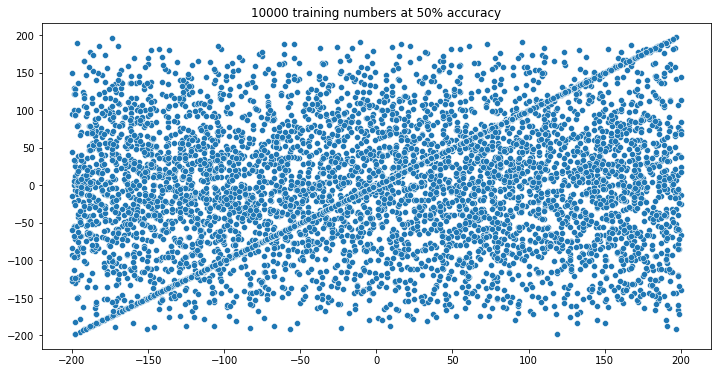

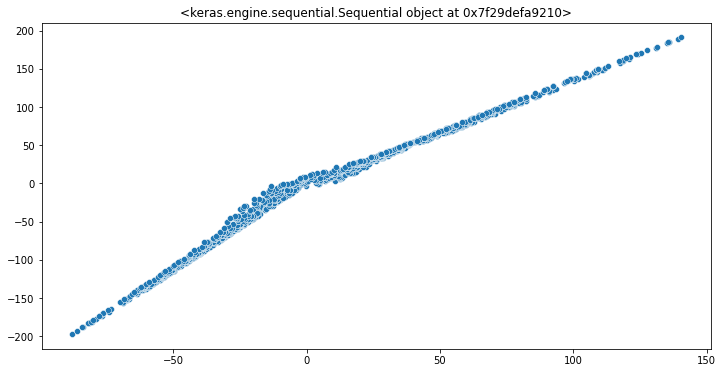

In [215]:
compare_scatter(14, 5, 1000)

### Predictions grid

In [248]:
def prediction_grid(trainingset_n, model_n, grid_min, grid_max):
    '''
    plot of a grid with predictions
    '''

    current_training_set = training_sets[trainingset_n]
    print(current_training_set)

    current_train_model = list_of_models[model_n]
    print(current_train_model)

    # trained model to use for grid construction
    current_test_model = train_model(current_train_model, current_training_set)

    grid = []
    row = []

    for i in range(grid_min, grid_max + 1, 1):
        row = []
        for j in range(grid_min, grid_max + 1, 1):
            temp_prediction = predict_model(current_test_model, [[i, j]])
            try:
                row.append(temp_prediction[0][0])
            except:
                row.append(temp_prediction[0])
        grid.append(row)

    return grid

In [247]:
pd.DataFrame(prediction_grid(10, 4, 0, 10))

10000 training numbers at 100% accuracy
XGBClassifier(eval_metric='rmse', gamma=1, learning_rate=0.3, n_estimators=50,
              objective='multi:softprob', subsample=0.5,
              use_label_encoder=False)


,0,1,2,3,4,5,6,7,8,9,10
0,9,2,8,2,2,2,9,9,9,9,9
1,9,9,9,2,2,2,9,9,9,9,9
2,5,5,5,5,8,8,9,9,9,9,9
3,5,5,5,5,8,8,9,9,9,9,9
4,5,5,5,5,8,8,9,9,9,19,19
5,5,12,12,12,12,12,12,12,9,19,19
6,5,12,12,5,12,12,12,12,9,19,19
7,5,12,12,12,12,12,12,12,9,19,19
8,5,12,12,12,12,12,12,12,9,19,19
9,12,12,12,12,12,12,12,12,9,19,19


In [249]:
pd.DataFrame(prediction_grid(10, 5, 0, 10))

10000 training numbers at 100% accuracy
313/313 [==============================] - 1s 5ms/step - loss: 12.7638


,0,1,2,3,4,5,6,7,8,9,10
0,-0,1,2,3,4,5,6,7,8,9,10
1,1,2,3,4,5,6,7,8,9,10,11
2,2,3,4,5,6,7,8,9,10,11,12
3,3,4,5,6,7,8,9,10,11,12,13
4,4,5,6,7,8,9,10,11,12,13,14
5,5,6,7,8,9,10,11,12,13,14,15
6,6,7,8,9,10,11,12,13,14,15,16
7,7,8,9,10,11,12,13,14,15,16,17
8,8,9,10,11,12,13,14,15,16,17,18
9,9,10,11,12,13,14,15,16,17,18,19


In [250]:
pd.DataFrame(prediction_grid(10, 2, 0, 10))

10000 training numbers at 100% accuracy
LinearRegression()


,0,1,2,3,4,5,6,7,8,9,10
0,-0,1,2,3,4,5,6,7,8,9,10
1,1,2,3,4,5,6,7,8,9,10,11
2,2,3,4,5,6,7,8,9,10,11,12
3,3,4,5,6,7,8,9,10,11,12,13
4,4,5,6,7,8,9,10,11,12,13,14
5,5,6,7,8,9,10,11,12,13,14,15
6,6,7,8,9,10,11,12,13,14,15,16
7,7,8,9,10,11,12,13,14,15,16,17
8,8,9,10,11,12,13,14,15,16,17,18
9,9,10,11,12,13,14,15,16,17,18,19


### more model viz???

In [ ]:




def model_viz(model, dataset):
    pass
    '''
    training scatterplot, test accuracy scatterplot
    prediction grid
    

    takes in: 
        size of training set, accuracy, model
    outputs: 
        graphic of training set (y vs y_correct)
        graphic of test predictions (y_pred vs y_correct)
        table of x1 vs x2 [-10, ... 10], with entries as predicted sums
            maybe do 10x10 (split pos/neg, incr by 2, etc...)
                see how it looks first

        OPTIONAL:
            graphic of predictions overlaid on correct answers? combine?
            histogram of error (incorporate inputs?)    
        
    '''

# other interesting things to look at

In [ ]:
# linear regression with HUUUUGE data sets, probably work without good accuracy
# how do I get a neural net good at adding, super deep/wide nets seem to work slightly better